<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Amazon Nova
</h1>
* Notebook completed by Adam Lang as part of the Analytics Vidhya course "Multimodal RAG"

* Date: 3/12/2025

In [1]:
%%capture
!pip install matplotlib transformers datasets accelerate sentence-transformers
!pip install ipywidgets

Amazon Nova is a new generation of multimodal understanding and creative content generation models that offer state-of-the-art quality, unparalleled customization, and the best price-performance. Amazon Nova models incorporate the same secure-by-design approach as all AWS services, with built-in controls for the safe and responsible use of AI.

Amazon Nova has two categories of models: 
 - **Understanding models** —These models are capable of reasoning over several input modalities, including text, video, and image, and output text. 
- **Creative Content Generation models** —These models generate images or videos based on a text or image prompt.
  
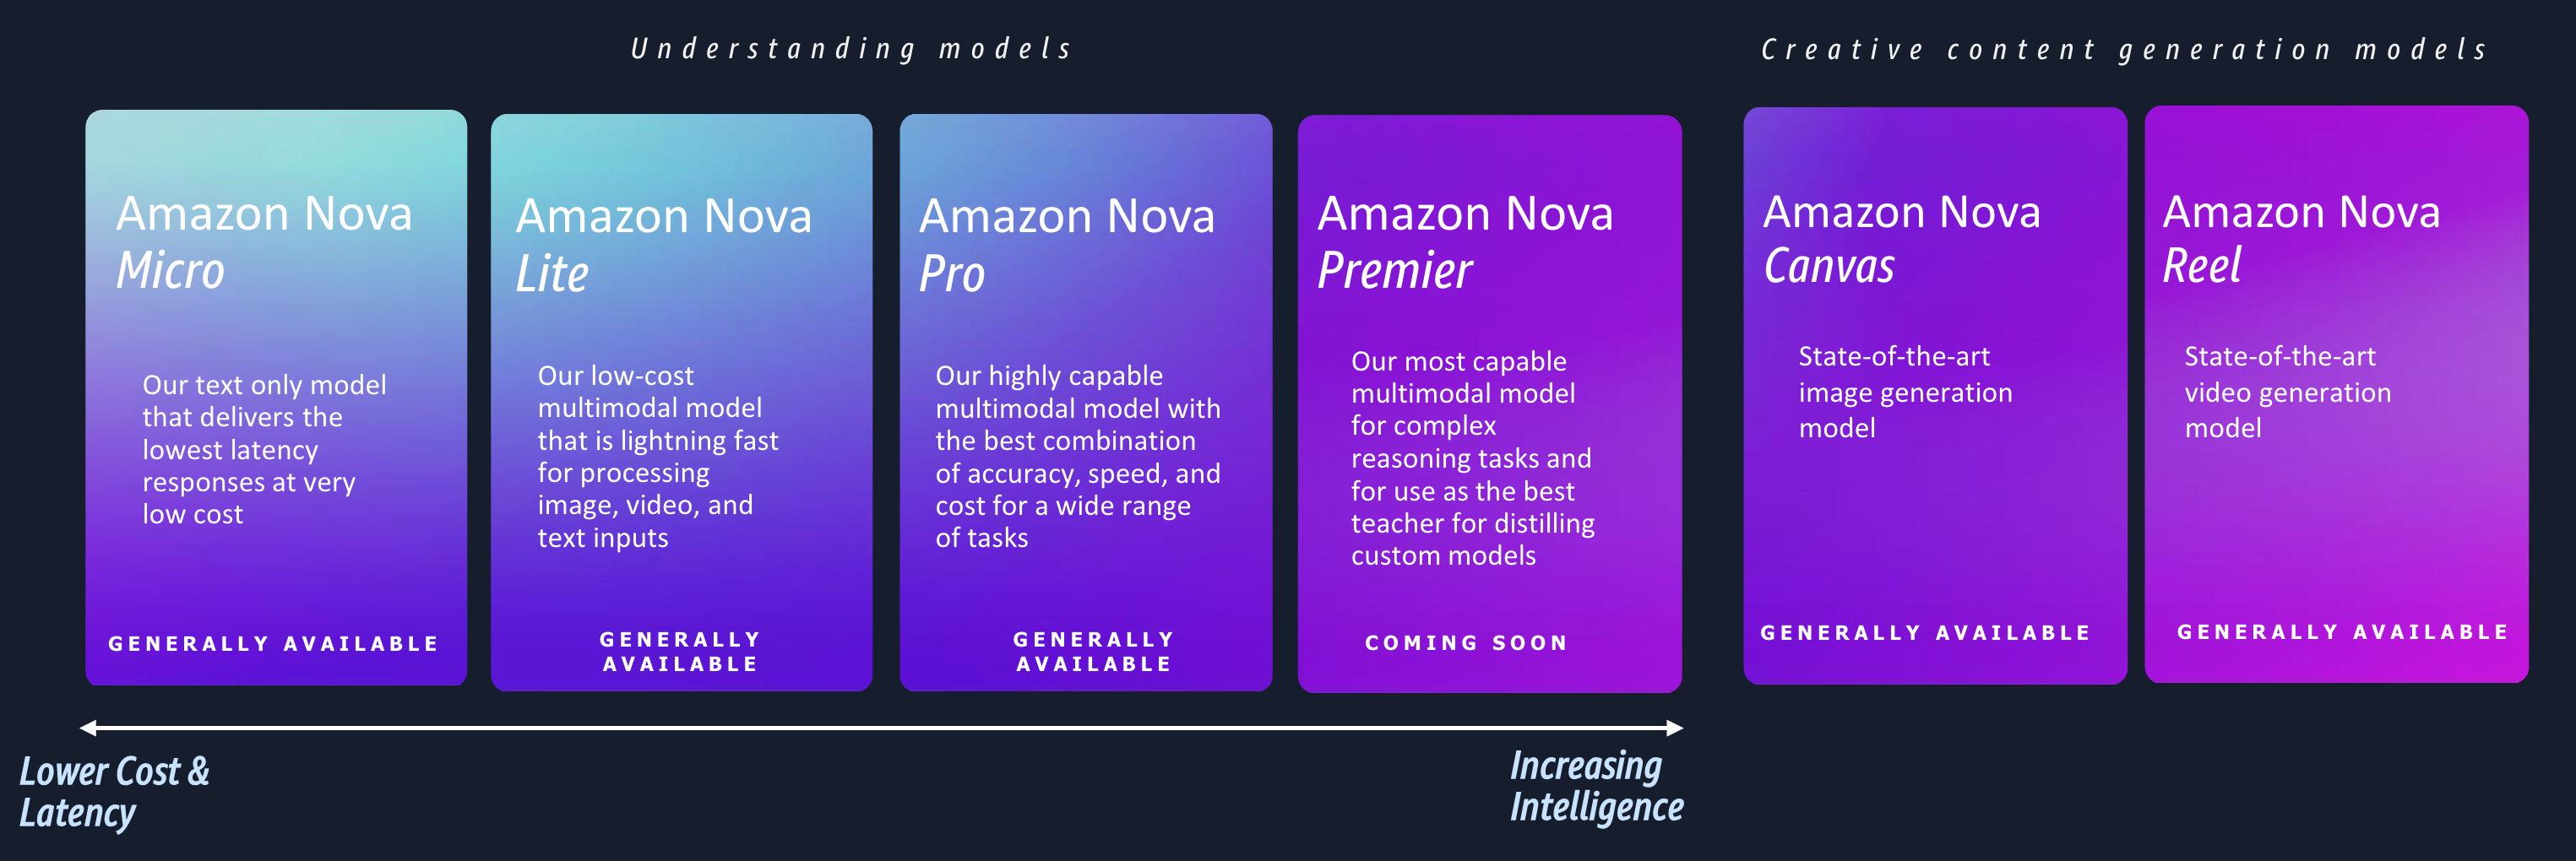


**Multimodal Understanding Models**
- **Amazon Nova Micro**: Lightening fast, cost-effective text-only model
- **Amazon Nova Lite**: Fastest, most affordable multimodal FM in the industry for its intelligence tier
- **Amazon Nova Pro**:  The fastest, most cost-effective, state-of-the-art multimodal model in the industry

**Creative Content Generation Models**
- **Amazon Nova Canvas**: State-of-the-art image generation model
- **Amazon Nova Reel**: State-of-the-art video generation model

The following notebooks will be focused primarily on Amazon Nova Understanding Models. 

**Amazon Nova Multimodal understanding** foundation models (FMs) are a family of models that are capable of reasoning over several input modalities, including text, video, documents and/or images, and output text.


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Setup
</h2>


**Gain Access to the Model**: If you have not yet requested for model access in Bedrock, you do so [request access following these instructions]
(https://docs.aws.amazon.com/bedrock/latest/userguide/model-access-modify.html).

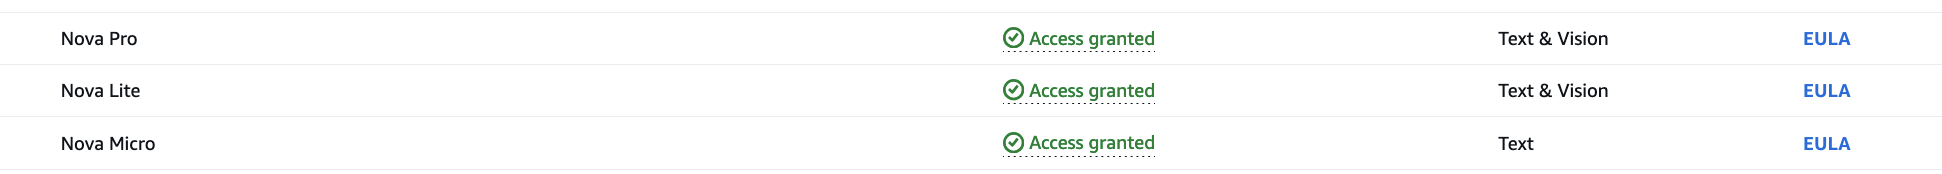


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  When to Use What?
</h2>


### When to Use `Amazon Nova Micro` 

Amazon Nova Micro (Text Input Only) is the fastest and most affordable option, optimized for large-scale, latency-sensitive deployments like conversational interfaces, chats, and high-volume tasks, such as classification, routing, entity extraction, and document summarization.

### When to Use `Amazon Nova Lite` 

Amazon Nova Lite balances intelligence, latency, and cost-effectiveness. It’s optimized for complex scenarios where low latency (minimal delay) is crucial, such as interactive agents that need to orchestrate multiple tool calls simultaneously. Amazon Nova Lite supports image, video, and text inputs and outputs text. 

### When to Use `Amazon Nova Pro` 
Amazon Nova Pro is designed for highly complex use cases requiring advanced reasoning, creativity, and code generation. Amazon Nova pro supports image, video, and text inputs and outputs text. 

### Prerequisites

Run the cells in this section to install the packages needed by the notebooks in this workshop. ⚠️ You will see pip dependency errors, you can safely ignore these errors.

<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Text Understanding
</h2>


In [26]:
import boto3
import json
import base64

## 3 model variables
PRO_MODEL_ID = "amazon.nova-pro-v1:0" # amazon.nova-pro-v1:0
LITE_MODEL_ID = "amazon.nova-lite-v1:0" # amazon.nova-lite-v1:0
MICRO_MODEL_ID = "amazon.nova-micro-v1:0" # amazon.nova-micro-v1:0

## inference profile ids
PRO_INFERENCE_PROFILE_ID = "<model arn id goes here>
LITE_INFERENCE_PROFILE_ID = "<model arn id goes here>
MICRO_INFERENCE_PROFILE_ID = "<model arn id goes here>

# Create a Bedrock Runtime client in the AWS Region of your choice.
client = boto3.client("bedrock-runtime",
                     region_name="eu-central-1")


### `InvokeModel` body and output -- Multimodal models
* Various image types are supported:
  1. "jpeg"|
  2. "png" |
  3. "gif" |
  4. "webp"
* Image has to be sent in base64 format

* Various video formats are supported as well.

The invoke_model() method of the Amazon Bedrock runtime client (InvokeModel API) will be the primary method we use for most of our Text Generation and Processing tasks

Although the method is shared, the format of input and output varies depending on the foundation model used - as described below:


```python
{
  "system": [
    {
      "text": string
    }
  ],
  "messages": [
    {
      "role": "user",# first turn should always be the user turn
      "content": [
        {
          "text": string
        },
        {
          "image": {
            "format": "jpeg"| "png" | "gif" | "webp",
            "source": {
              "bytes": "base64EncodedImageDataHere..."#  base64-encoded binary
            }
          }
        },
        {
          "video": {
            "format": "mkv" | "mov" | "mp4" | "webm" | "three_gp" | "flv" | "mpeg" | "mpg" | "wmv",
            "source": {
            # source can be s3 location of base64 bytes based on size of input file. 
               "s3Location": {
                "uri": string, #  example: s3://my-bucket/object-key
                "bucketOwner": string #  (Optional) example: 123456789012)
               }
              "bytes": "base64EncodedImageDataHere..." #  base64-encoded binary
            }
          }
        },
      ]
    },
    {
      "role": "assistant",
      "content": [
        {
          "text": string # prefilling assistant turn
        }
      ]
    }
  ],
 "inferenceConfig":{ # all Optional
    "max_new_tokens": int, #  greater than 0, equal or less than 5k (default: dynamic*)
    "temperature": float, # greater then 0 and less than 1.0 (default: 0.7)
    "top_p": float, #  greater than 0, equal or less than 1.0 (default: 0.9)
    "top_k": int #  0 or greater (default: 50)
    "stopSequences": [string]
  },
  "toolConfig": { #  all Optional
        "tools": [
                {
                    "toolSpec": {
                        "name": string # menaingful tool name (Max char: 64)
                        "description": string # meaningful description of the tool
                        "inputSchema": {
                            "json": { # The JSON schema for the tool. For more information, see JSON Schema Reference
                                "type": "object",
                                "properties": {
                                    <args>: { # arguments 
                                        "type": string, # argument data type
                                        "description": string # meaningful description
                                    }
                                },
                                "required": [
                                    string # args
                                ]
                            }
                        }
                    }
                }
            ],
   "toolChoice": "any" //Amazon Nova models ONLY support tool choice of "any"
        }
    }
}
```

The following are required parameters.

* `system` – (Optional) The system prompt for the request.
    A system prompt is a way of providing context and instructions to Amazon Nova, such as specifying a particular goal or role.
* `messages` – (Required) The input messages.
    * `role` – The role of the conversation turn. Valid values are user and assistant. 
    * `content` – (required) The content of the conversation turn.
        * `type` – (required) The type of the content. Valid values are image, text. , video
            * if chosen text (text content)
                * `text` - The content of the conversation turn. 
            * If chosen Image (image content)
                * `source` – (required) The base64 encoded image bytes for the image.
                * `format` – (required) The type of the image. You can specify the following image formats. 
                    * `jpeg`
                    * `png`
                    * `webp`
                    * `gif`
            * If chosen video: (video content)
                * `source` – (required) The base64 encoded image bytes for the video or S3 URI and bucket owner as shown in the above schema
                * `format` – (required) The type of the video. You can specify the following video formats. 
                    * `mkv`
                    *  `mov`  
                    *  `mp4`
                    *  `webm`
                    *  `three_gp`
                    *  `flv`  
                    *  `mpeg`  
                    *  `mpg`
                    *  `wmv`
* `inferenceConfig`: These are inference config values that can be passed in inference.
    * `max_new_tokens` – (Optional) The maximum number of tokens to generate before stopping.
        Note that Amazon Nova models might stop generating tokens before reaching the value of max_tokens. Maximum New Tokens value allowed is 5000.
    * `temperature` – (Optional) The amount of randomness injected into the response.
          * Note: it is recommended NOT to change top_p and temperate at the same time. Choose one or the other as they have a similar outcome.
    * `top_p` – (Optional) Use nucleus sampling. Amazon Nova computes the cumulative distribution over all the options for each subsequent token in decreasing probability order and cuts it off once it reaches a particular probability specified by top_p. You should alter either temperature or top_p, but not both.
          * Example:
          * Lets say the top_p is 0.7. and the vocab size is 6.
          * Lets say the probabilities are: 0.5, 0.2, 0.15, 0.1, 0.05, 0.05.
          * Top_p sampling will only take the top 2 tokens.
    * `top_k` – (Optional) Only sample from the top K options for each subsequent token. Use top_k to remove long tail low probability responses.
          * If top_k is 10 it will only sample from the top 10 tokens.
          * If top_k is small then sampling space is small, if big the sampling space is large.
    * `stopSequences` – (Optional) Array of strings containing step sequences. If the model generates any of those strings, generation will stop and response is returned up until that point. 
    * `toolConfig` – (Optional) JSON object following ToolConfig schema,  containing the tool specification and tool choice. This schema is the same followed by the Converse API




<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Synchronous API Call
</h2>

In [3]:
# 1. Define your system prompt(s).
## "Character of the model or role to play"
system_list = [
    { "text": "You should respond to all messages in french" }
]

# 2. Define one or more messages using the "user" and "assistant" roles.
## This should contain the actual prompt itself. 
message_list = [
    {"role": "user", 
     "content": [{"text": "FreeCodeCamp is a great platform to learn coding and technology in the field of computer science"}]},
]

# 3. Configure the inference parameters -- notice we did not change temperature 
## and instead used top_p
inf_params = {"max_new_tokens": 300, "top_p": 0.9, "top_k": 20}

## 4. Request body that model expects
native_request = {
    "messages": message_list,
    "system": system_list,
    "inferenceConfig": inf_params,
}

# 5. Invoke the Bedrock model and extract the response body.
### if not using a specific arn profile use this response block below
# response = client.invoke_model(modelId=LITE_MODEL_ID, 
#                                body=json.dumps(native_request))


## invoke using specific arn profile -- LITE, PRO, MICRO
response = client.invoke_model(
    modelId=LITE_INFERENCE_PROFILE_ID,  # Use the Inference Profile ID/ARN instead of LITE_MODEL_ID
    body=json.dumps(native_request)
)
## extract response
request_id = response["ResponseMetadata"]["RequestId"]
model_response = json.loads(response["body"].read())

# # Pretty print the response JSON.
# print("\n[Full Response]")
# print(json.dumps(model_response, indent=2))

# Print the text content for easy readability.
content_text = model_response["output"]["message"]["content"][0]["text"]
print(content_text)

FreeCodeCamp est une excellente plateforme pour apprendre le codage et la technologie dans le domaine de l'informatique. Elle offre une variété de ressources éducatives, de tutoriels et de défis pratiques qui permettent aux apprenants de développer leurs compétences de programmation. Que vous soyez débutant ou que vous cherchiez à approfondir vos connaissances, FreeCodeCamp propose des cours sur divers langages de programmation, frameworks et technologies. Les projets communautaires et les certifications disponibles ajoutent également de la valeur à votre parcours d'apprentissage. Est-ce que vous avez déjà utilisé FreeCodeCamp, ou envisagez-vous de commencer vos études là-bas ?


Summary
* We can see that the model gave us a summary about FreeCodeCamp in French as prompted to do so.

<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Streaming API Call
</h2>

Notes
* The overall code setup below is mostly the same as the previous. The main difference is that when we invoke the model we are using `client.invoke_model_with_response_stream`

In [4]:
from datetime import datetime

# 1. Define your system prompt(s).
system_list = [
    { "text": "Act as a creative writing assistant. When the user provides you with a topic, write a short story about that topic." }
]

# 2. Define one or more messages using the "user" and "assistant" roles.
message_list = [{"role": "user", "content": [{"text": "A camping trip"}]}]

# 3. Configure the inference parameters.
inf_params = {"max_new_tokens": 1000, "top_p": 0.9, "top_k": 20}

## 4. Body request
request_body = {
    "messages": message_list,
    "system": system_list,
    "inferenceConfig": inf_params,
}

start_time = datetime.now()

# Invoke the model with the response stream
# response = client.invoke_model_with_response_stream(
#     modelId=LITE_MODEL_ID, body=json.dumps(request_body)
# )
## invoke response from model if using ARN profile
## Invoke the model with the response stream
response = client.invoke_model_with_response_stream(
    modelId=LITE_INFERENCE_PROFILE_ID,  # Use the Inference Profile ID/ARN instead of LITE_MODEL_ID
    body=json.dumps(native_request)
)

chunk_count = 0
time_to_first_token = None

# Process the response stream from the Nova model
stream = response.get("body")
if stream:
    for event in stream:
        chunk = event.get("chunk")
        if chunk:
            # Print the response chunk
            chunk_json = json.loads(chunk.get("bytes").decode())
            # Pretty print JSON
            # print(json.dumps(chunk_json, indent=2, ensure_ascii=False))
            content_block_delta = chunk_json.get("contentBlockDelta")
            if content_block_delta:
                if time_to_first_token is None:
                    time_to_first_token = datetime.now() - start_time
                    print(f"Time to first token: {time_to_first_token}")

                chunk_count += 1
                current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S:%f")
                # print(f"{current_time} - ", end="")
                print(content_block_delta.get("delta").get("text"), end="")
    print(f"\nTotal chunks: {chunk_count}")
else:
    print("No response stream received.")

Time to first token: 0:00:00.269814
FreeCodeCamp est une excellente plateforme pour apprendre le codage et la technologie dans le domaine de l'informatique. Elle offre une variété de ressources gratuites pour les personnes souhaitant acquérir de nouvelles compétences en programmation. Que vous soyez débutant ou que vous cherchiez à approfondir vos connaissances, FreeCodeCamp propose des tutoriels interactifs, des défis pratiques et une communauté dynamique pour vous soutenir tout au long de votre parcours d'apprentissage. C'est une ressource précieuse pour ceux qui cherchent à se lancer dans le monde de la programmation.
Total chunks: 140


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Image Understanding 
</h2>


Amazon Nova models allow you to include multiple images in the payload with a limitation of total payload size to not go beyond 25MB. 
Amazon Nova models can analyze the passed images and answer questions, classify an image, as well as summarize images based on provided instructions.

## Image size information

To provide the best possible results, Amazon Nova automatically rescales input images up or down depending on their aspect ratio and original resolution. For each image, Amazon Nova first identifies the closest aspect ratio from 1:1, 1:2, 1:3, 1:4, 1:5, 1:6, 1:7, 1:8, 1:9 2:3, 2:4 and their transposes. Then the image is rescaled so that at least one side of the image is greater than 896px or the length of shorter side of the original image, while maintaining the closest aspect ratio. There's a maximum resolution of 8,000x8,000 pixels.

## Image to tokens conversion

As previously discussed, images are resized to maximize information extraction, while still maintaining the aspect ratio. What follows are some examples of sample image dimensions and approximate token calculations.

| image_resolution (HxW or WxH) | 900 x 450 | 900 x 900 | 1400 x 900 | 1.8K x 900 | 1.3Kx1.3K |
|------------------------------|-----------|-----------|------------|------------|-----------|
| Estimated token count        | ~800      | ~1300     | ~1800      | ~2400      | ~2600     |

So for example, consider an example image that is 800x400 in size, and you want to estimate the token count for this image. Based on the dimensions, to maintain an aspect ratio of 1:2, the closest resolution is 900x450. Therefore, the approximate token count for this image is about 800 tokens.


Lets see how Nova model does on Image Understanding Usecase. 

Here we will pass this image and ask model to try to create 3 art titles for this image. 

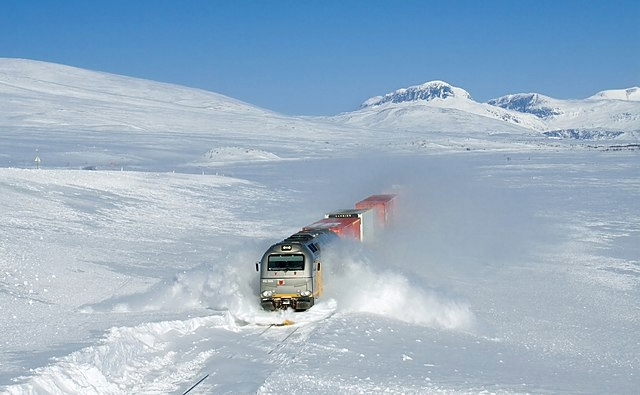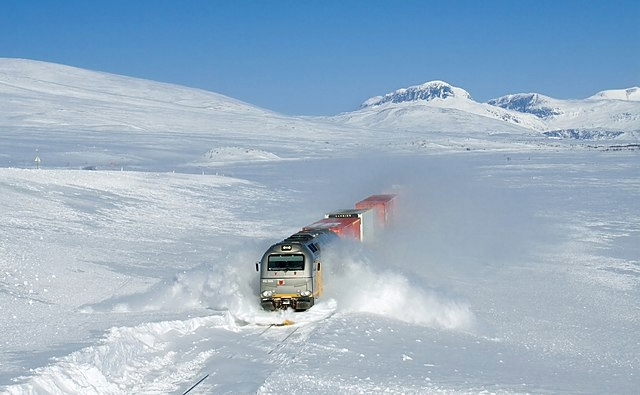

In [10]:
## We will send image and request Nova model generate 3 titles for the image

# 1. Open the image you'd like to use and encode it as a Base64 string.
with open("snow.png", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode("utf-8")

# 2. Define your system prompt(s).
system_list = [
    { "text": "You are an expert artist. When the user provides you with an image, provide 3 potential art titles" }
]

# Define a "user" message including both the image and a text prompt.
message_list = [
    {
        "role": "user",
        "content": [
            {
                "image": {
                    "format": "png",
                    "source": {"bytes": base64_string},
                }
            },
            {"text": "Provide art titles for this image."},
        ],
    }
]

# Configure the inference parameters -- use top_k instead of temperature
inf_params = {"max_new_tokens": 300, "top_p": 0.1, "top_k": 20}

native_request = {
    "messages": message_list,
    "system": system_list,
    "inferenceConfig": inf_params,
}

# Invoke the model and extract the response body.
# response = client.invoke_model(modelId=LITE_MODEL_ID, body=json.dumps(native_request))
## invoke using specific arn profile -- LITE, PRO, MICRO
response = client.invoke_model(
    modelId=LITE_INFERENCE_PROFILE_ID,  # Use the Inference Profile ID/ARN instead of LITE_MODEL_ID
    body=json.dumps(native_request)
)
## get model response
model_response = json.loads(response["body"].read())

# Pretty print the response JSON.
print("[Full Response]")
print(json.dumps(model_response, indent=2))

# Print the text content for easy readability.
content_text = model_response["output"]["message"]["content"][0]["text"]
print("\n[Response Content Text]")
print(content_text)

[Full Response]
{
  "output": {
    "message": {
      "content": [
        {
          "text": "1. \"Snowbound Journey: The Train's Path Through Winter's Embrace\"\n2. \"Frosty Frontier: A Train's Daring Dash Across the Snowy Expanse\"\n3. \"Winter's Fury: The Train's Battle Against the Blizzard's Wrath\""
        }
      ],
      "role": "assistant"
    }
  },
  "stopReason": "end_turn",
  "usage": {
    "inputTokens": 1756,
    "outputTokens": 59,
    "totalTokens": 1815,
    "cacheReadInputTokenCount": 0,
    "cacheWriteInputTokenCount": 0
  }
}

[Response Content Text]
1. "Snowbound Journey: The Train's Path Through Winter's Embrace"
2. "Frosty Frontier: A Train's Daring Dash Across the Snowy Expanse"
3. "Winter's Fury: The Train's Battle Against the Blizzard's Wrath"


There can be multiple image contents. In this example we ask the model to find what two images have in common:

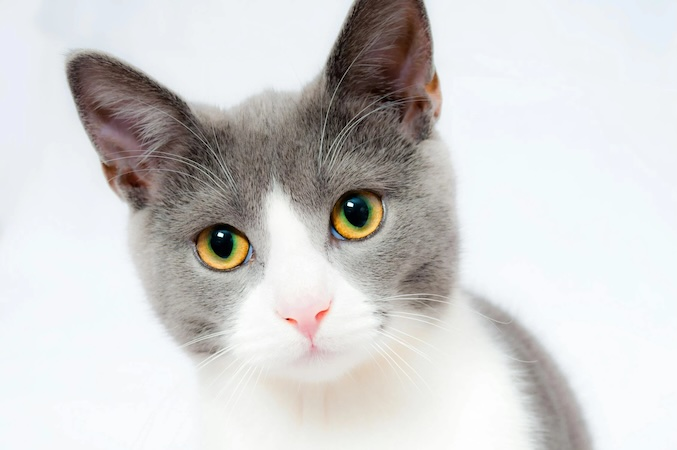

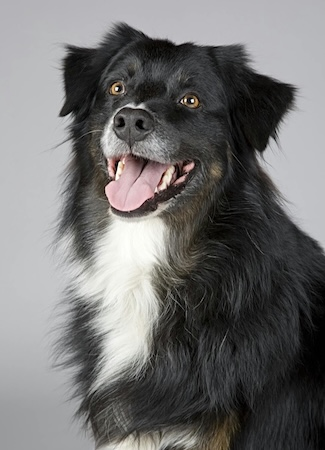


In [12]:
### Process 2 separate images separately
# Open the image you'd like to use and encode it as a Base64 string.
with open("dog.jpeg", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    dog_base64_string = base_64_encoded_data.decode("utf-8")

with open("cat.jpeg", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    cat_base64_string = base_64_encoded_data.decode("utf-8")

# Define a "user" message including both the image and a text prompt.
## We are asking a complex question to the model
message_list = [
    {
        "role": "user",
        "content": [
            {
                "image": {
                    "format": "jpeg",
                    "source": {"bytes": dog_base64_string},
                }
            },
            {
                "image": {
                    "format": "jpeg",
                    "source": {"bytes": cat_base64_string},
                }
            },
            {"text": "What do these two images have in common?"},
        ],
    }
]

# Configure the inference parameters.
inf_params = {"max_new_tokens": 300, "top_p": 0.1, "top_k": 20}

native_request = {
    "messages": message_list,
    "inferenceConfig": inf_params,
}

# Invoke the model and extract the response body.
# response = client.invoke_model(modelId=LITE_MODEL_ID, body=json.dumps(native_request))
## invoke using specific arn profile -- LITE, PRO, MICRO
response = client.invoke_model(
    modelId=LITE_INFERENCE_PROFILE_ID,  # Use the Inference Profile ID/ARN instead of LITE_MODEL_ID
    body=json.dumps(native_request)
)

model_response = json.loads(response["body"].read())

# # Pretty print the response JSON.
# print("[Full Response]")
# print(json.dumps(model_response, indent=2))

# Print the text content for easy readability.
content_text = model_response["output"]["message"]["content"][0]["text"]
print(content_text)

The two images depict animals, specifically a dog and a cat, both of which are pets. They are both looking directly at the camera, and the cat has its mouth open. The dog has its tongue out, and the cat has its eyes open. The dog is black and white, and the cat is gray and white.


<h2 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Video Understanding
</h2>


The Amazon Nova models allow you to include a single video in the payload, which can be provided either in base64 format or through an Amazon S3 URI. When using the base64 method, the overall payload size must remain within 25MB. However, you can specify an Amazon S3 URI for video understanding. This approach enables you to leverage the model for longer videos (up to 1GB in size) without being constrained by the overall payload size limitation. Amazon Nova models can analyze the passed video and answer questions, classify a video, and summarize information in the video based on provided instructions.

| Media File Type | File Formats supported | Input Method |
|----------------|------------------------|--------------|
| Video | MP4, MOV, MKV, WebM, FLV, MPEG, MPG, WMV, 3GP | Base64 <br> _(Recommended for payload size less than 25MB)_ <br><br> Amazon S3 URI <br> _(Recommended for payload greater than 25MB up to 1GB)_ |

There are no differences in the video input token count, regardless of whether the video is passed as base64 (as long as it fits within the size constraints) or via an Amazon S3 location.

Note that for 3gp file format, the "format" field passed in the API request should be of the format "three_gp".

When using Amazon S3, ensure that you are set the "Content-Type" metadata to the correct MIME type for the video.

## Video size information

Amazon Nova video understanding capabilities support Multi-Aspect Ratio. All videos are resized with distortion (up or down, based on the input) to 672*672 square dimensions before feeding it to the model. The model utilizes a dynamic sampling strategy based on the length of the video. For videos less than or equal to 16 minutes in duration, a 1 frame per second (FPS) sampling rate is employed. However, for videos exceeding 16 minutes in length, the sampling rate decreases in order to maintain a consistent 960 frames sampled, with the frame sampling rate varying accordingly. This approach is designed to provide more accurate scene-level video understanding for shorter videos compared to longer video content. We recommend that you keep the video length less than 1 hour for low motion, and less than 16 minutes for anything with higher motion.

There should be no difference when analyzing a 4k version of a video and a Full HD version. Similarly, because the sampling rate is at most 1 FPS, a 60 FPS video should perform as well as a 30 FPS video. Because of the 1GB limit in video size, using higher than required resolution and FPS is not beneficial and will limit the video length that fits in that size limit. You might want to pre-process videos longer than 1GB.

## Video tokens

The length of the video is main factor impacting the number of tokens generated. To calculate the approximate cost, you should multiply the estimated number of video tokens by the per-token price of the specific model being utilized.

This table has some approximations of frame sampling and token utilization per video length:

| video_duration | 10 sec | 30 sec | 16 min | 20 min | 30 min | 45 min | 1 hr | 1.5 hr |
|----------------|---------|---------|---------|---------|---------|---------|-------|---------|
| frames_to_sample | 10 | 30 | 960 | 960 | 960 | 960 | 960 | 960 |
| sample_rate_fps | 1 | 1 | 1 | 0.755 | 0.5 | 0.35556 | 0.14 | 0.07 |
| Estimated token count | 2,880 | 8,640 | 276,480 | 276,480 | 276,480 | 276,480 | 276,480 | 276,480 |


In [13]:
from IPython.display import Video

Video("the-sea.mp4")

In [15]:
# Open the image you'd like to use and encode it as a Base64 string.
with open("the-sea.mp4", "rb") as video_file:
    binary_data = video_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode("utf-8")

# 1. Define your system prompt(s).
system_list = [
    { "text": "You are an expert media analyst. When the user provides you with a video, provide 3 potential video titles" }
]

# 2. Define a "user" message including both the image and a text prompt.
message_list = [
    {
        "role": "user",
        "content": [
            {
                "video": {
                    "format": "mp4",
                    "source": {"bytes": base64_string},
                }
            },
            {"text": "Provide video titles for this clip."},
        ],
    }
]

# 3. Configure the inference parameters.
inf_params = {"max_new_tokens": 300, "top_p": 0.1, "top_k": 20}

native_request = {
    "messages": message_list,
    "system": system_list,
    "inferenceConfig": inf_params,
}

# Invoke the model and extract the response body.
# response = client.invoke_model(modelId=LITE_MODEL_ID, body=json.dumps(native_request))
## invoke using specific arn profile -- LITE, PRO, MICRO
response = client.invoke_model(
    modelId=LITE_INFERENCE_PROFILE_ID,  # Use the Inference Profile ID/ARN instead of LITE_MODEL_ID
    body=json.dumps(native_request)
)

model_response = json.loads(response["body"].read())

# # Pretty print the response JSON.
# print("[Full Response]")
# print(json.dumps(model_response, indent=2))

# Print the text content for easy readability.
content_text = model_response["output"]["message"]["content"][0]["text"]
print("\n[Response Content Text]")
print(content_text)


[Response Content Text]
1. "Majestic Ocean Cliffs and a Shell's Journey: A Coastal Adventure"
2. "From Rocky Shores to Sandy Beaches: A Coastal Exploration"
3. "Waves, Rocks, and a Shell's Tale: A Scenic Coastal Journey"


### Video Understanding using S3 Bucket Path

Check if bucket access is available.

In [28]:
import boto3

s3 = boto3.client('s3')
try:
    response = s3.head_object(Bucket='<name of your s3 bucket>', Key='amazon_nova_experiments/the-sea.mp4')
    print("S3 access successful")
except Exception as e:
    print(f"S3 access failed: {str(e)}")

S3 access successful


In [33]:
minimal_request = {
    "schemaVersion": "messages-v1",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "text": "Hello, can you process video inputs?"
                }
            ]
        }
    ]
}

try:
    response = client.invoke_model(modelId=PRO_INFERENCE_PROFILE_ID, body=json.dumps(minimal_request))
    print("Request successful")
    print(json.loads(response['body'].read()))
except Exception as e:
    print(f"Request failed: {str(e)}")

Request successful
{'output': {'message': {'content': [{'text': "Hello! I don't have the capability to process video inputs directly. However, I can provide you with information on how to process videos using various programming languages and libraries. \n\nFor example, in Python, you can use libraries like OpenCV to process videos. Here’s a basic example of how you might read a video file and display it frame by frame:\n\n```python\nimport cv2\n\n# Open the video file\ncap = cv2.VideoCapture('video.mp4')\n\nwhile(cap.isOpened()):\n    ret, frame = cap.read()\n    \n    if ret:\n        # Display the frame\n        cv2.imshow('Frame', frame)\n        \n        # Press Q on keyboard to exit\n        if cv2.waitKey(25) & 0xFF == ord('q'):\n            break\n    else:\n        break\n\n# Release the capture and close any open windows\ncap.release()\ncv2.destroyAllWindows()\n```\n\nIf you have a specific task in mind related to video processing, feel free to ask, and I can provide more de

Summary
* The output above explains why this PRO nova model does not support video and why there is an error. Instead I will try using OPEN CV2 model to process video.

In [27]:
# Define your system prompt(s).
system_list = [
    { "text": "You are an expert media analyst. When the user provides you with a video, provide 3 potential video titles" }
]

# Define a "user" message including both the image and a text prompt.
message_list = [
    {
        "role": "user",
        "content": [
            {
                "video": {
                    "format": "mp4",
                    "source": {
                        "s3Location": {
                            # Replace the S3 URI
                            "uri": "s3://<your bucket name>/the-sea.mp4"
                            
                        }
                    },
                }
            },
            {"text": "Provide video titles for this clip."},
        ],
    }
]

# Configure the inference parameters.
inf_params = {"max_new_tokens": 300, "top_p": 0.1, "top_k": 20, "temperature": 0.3}

native_request = {
    "schemaVersion": "messages-v1",
    "messages": message_list,
    "system": system_list,
    "inferenceConfig": inf_params,
}

# Invoke the model and extract the response body.
response = client.invoke_model(modelId=PRO_INFERENCE_PROFILE_ID, body=json.dumps(native_request))
model_response = json.loads(response["body"].read())

# # Pretty print the response JSON.
print("[Full Response]")
print(json.dumps(model_response, indent=2))

# Print the text content for easy readability.
content_text = model_response["output"]["message"]["content"][0]["text"]
print(content_text)

ValidationException: An error occurred (ValidationException) when calling the InvokeModel operation: Invalid Input